#Vino

Utilizando estos datos sobre vino escriba un notebook de IPython / Jupyter que clasifique de la mejor manera los datos usando: k-means (¿cuántos clusters son el numero óptimo?), PCA (¿cuántas componentes son las óptimas?) y random forests (¿cuántos árboles son las óptimos?). Justifique cuál de los tres metodos produce los mejores resultados de clasificación en este caso.

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#K-Clusters

In [38]:
df = pd.read_csv('wine.data')
df.columns = ['class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 
              'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 
              'OD280/OD315 of diluted wines', 'proline']

wine_class = df['class']
wine_alcohol = df['alcohol']
wine_malic = df['malic acid']
wine_ash = df['ash']
wine_alcalinity = df['alcalinity of ash']
wine_magnesium = df['magnesium']
wine_phenols = df['total phenols']
wine_flavanoids = df['flavanoids']
wine_nonfavanoids = df['nonflavanoid phenols']
wine_proanth = df['proanthocyanins']
wine_color = df['color intensity']
wine_hue = df['hue']
wine_OD = df['OD280/OD315 of diluted wines']
wine_proline = df['proline']

df = df.drop('class', 1)
df = scale(df)

In [39]:
np.random.seed(1)

In [40]:
n_wines = len(wine_class)

In [43]:
data = df[range(n_wines)]
targets = np.array(wine_class.iloc[range(n_wines)])

Ahora hallamos los K clusters para n_wines_training valores de K

In [44]:
ks = np.zeros(n_wines-1) 
inertias = np.zeros(n_wines-1) #Sum of distances of samples to their closest cluster center.

In [45]:
for i in range(1, n_wines):

    km = KMeans(n_clusters=i)
    km.fit(data)

    ks[i-1] = i
    inertias[i-1] = km.inertia_

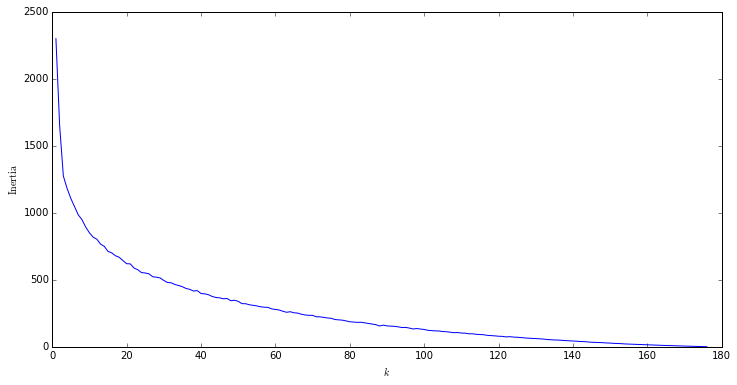

In [46]:
plt.figure(figsize=(12,6))
plt.plot(ks, inertias)
plt.xlabel('$k$')
plt.ylabel('$\mathrm{Inertia}$')

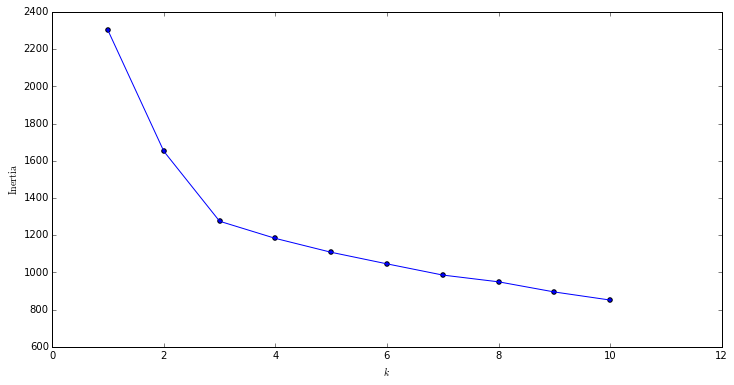

In [47]:
plt.figure(figsize=(12,6))
plt.plot(ks[:10], inertias[:10])
plt.scatter(ks[:10], inertias[:10])
plt.xlabel('$k$')
plt.ylabel('$\mathrm{Inertia}$')

Entre más grande es $k$, menor es la inercia, lo cual es esperado porque entre más cluster existan se pueden agrupar más cercanos. Sin embargo, con esta logica terminaríamos escgoiendo el número de clusters igual al numero de vinos, lo cual no es lo que queremos. Para evitar esto, no vamos a escoger la inercia minima, sino que vamos a analizar el cambio de inercia por k. Queremos encontrar el punto en el que éste cambio se sature.

(0, 700)

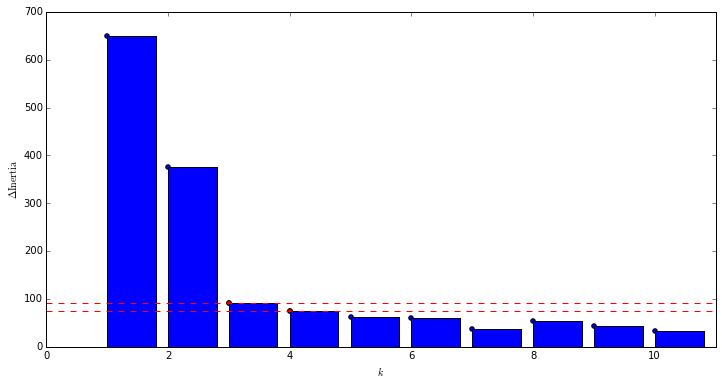

In [50]:
plt.figure(figsize=(12,6))
plt.bar(ks[:10], inertias[:10]-inertias[1:11])
plt.scatter(ks[:10], inertias[:10]-inertias[1:11])
plt.scatter(ks[2:4], inertias[2:4]-inertias[3:5], c='r')
plt.hlines(inertias[2:4]-inertias[3:5], 0, 11, linestyle='--', color='r')
plt.xlabel('$k$')
plt.ylabel('$\Delta\mathrm{Inertia}$')
plt.xlim(0,11)
plt.ylim(0,700)

Podemos ver que hay 2 candidatos a $k$ que corresponden a 3 y 4. En la grafica de arriba se ve en 3 la diferencia de inercia entre 3 y 4. En 4 se ve la diferencia de inercia entre 4 y 5. Sin embargo es confuso poder determinar entre $k=3$ y $k=4$ cúal es el número optimo de clusters. En particular porque si se usan datos de prueba y se ve cual predice mejor los clusters, no se peude comparar el 4 pues no generaría los grupos que los datos verdaderos espera. Esto muestra que para dimensionalidades grandes, como ya los 13, se deben reducir los datos por otros métodos (como PCA) para poder definir de mejor forma los clusters. K-clusters es una buena tecnica si se baja un poco más la dimensionalidad. Lo bueno es que ya nos redujo a 3 o 4 clasificaciones de vino. 

In [15]:
#silouhete si alcanzo

#PCA

In [52]:
pca = PCA(n_components=13)
pca.fit(df)

PCA(copy=True, n_components=13, whiten=False)

Después de hacer el fit con PCA se quiere analizar que numero de componentes podría generar un explained variance ratio que sea aún significativamente pequeño, en comparación al inicial. Para eso se usa el atributo de pca, el cual se grafica a continuación para cada numero de componentes. 

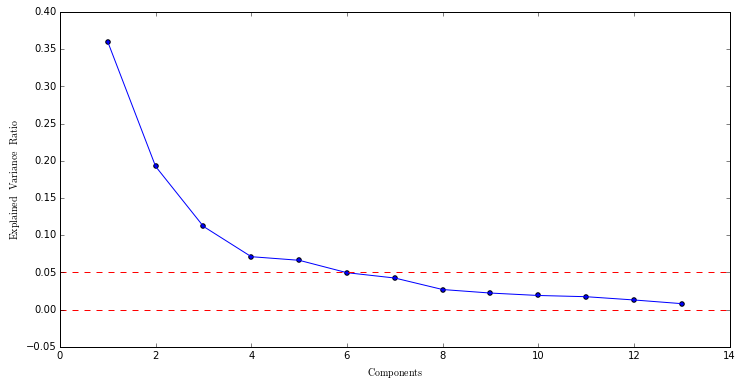

In [56]:
plt.figure(figsize=(12,6))
plt.plot(range(1,14), pca.explained_variance_ratio_)
plt.scatter(range(1,14), pca.explained_variance_ratio_)
plt.axhline(0,0,1, color='r', linestyle='--')
plt.axhline(0.05,0,1, color='r', linestyle='--')
plt.xlabel('$\mathrm{Components}$')
plt.ylabel('$\mathrm{Explained\;Variance\;Ratio}$')

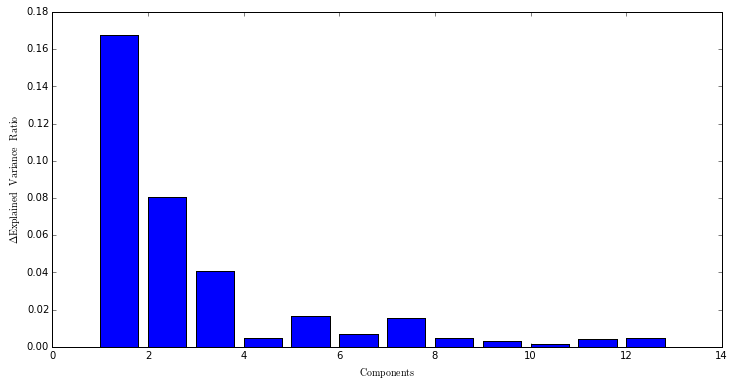

In [70]:
plt.figure(figsize=(12,6))
plt.bar(range(1,13),abs(pca.explained_variance_ratio_[1:13]-pca.explained_variance_ratio_[0:12]))
plt.xlabel('$\mathrm{Components}$')
plt.ylabel('$\Delta\mathrm{Explained\;Variance\;Ratio}$')

Esto muestra que efectivamente podemos reducir nuestra dimensionalidad y estar aún debajo de un Explained Variance Ratio bastante pequeño porcentualmente hablando. El numero de componentes ideales que se peude escoger varía entre 8 y 10 componentes. Vamos a probar con ambos y luego haciendo analisis de K-clusters para ver si logramos llegar a la clasificación de 3 clases de vinos.

In [71]:
pca_8 = PCA(n_components=8)
pca_8.fit(df)

df_8 = pca_8.transform(df)

In [73]:
pca_10 = PCA(n_components=10)
pca_10.fit(df)

df_10 = pca_10.transform(df)

In [74]:
print np.shape(df_8)
print np.shape(df_10)

(177, 8)
(177, 10)


(0, 700)

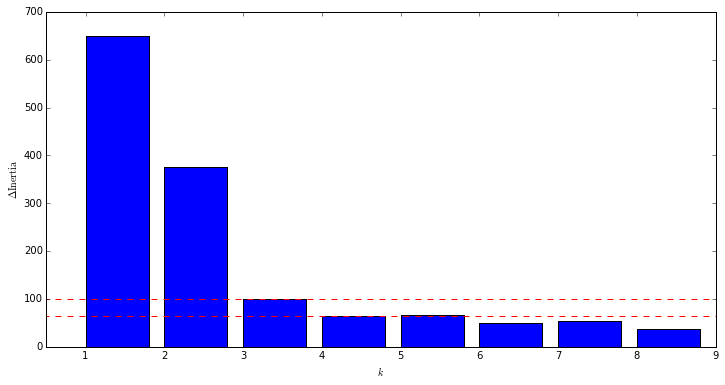

In [83]:
#8 components

ks_8 = np.zeros(9) 
inertias_8 = np.zeros(9)

for i in range(1, 10):

    km = KMeans(n_clusters=i)
    km.fit(df_8)

    ks_8[i-1] = i
    inertias_8[i-1] = km.inertia_
    
plt.figure(figsize=(12,6))
plt.bar(ks_8[:8], inertias_8[0:8]-inertias_8[1:9])
plt.hlines(inertias_8[2:4]-inertias_8[3:5], 0, 11, linestyle='--', color='r')
plt.xlabel('$k$')
plt.ylabel('$\Delta\mathrm{Inertia}$')
plt.xlim(0.5,9)
plt.ylim(0,700)

(0, 700)

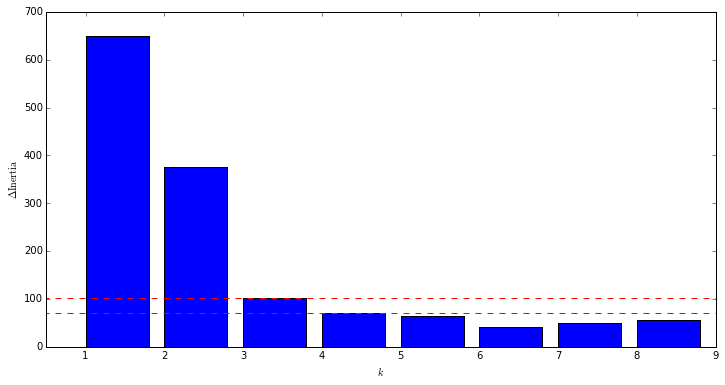

In [84]:
#10 components

ks_10 = np.zeros(9) 
inertias_10 = np.zeros(9)

for i in range(1, 10):

    km = KMeans(n_clusters=i)
    km.fit(df_10)

    ks_10[i-1] = i
    inertias_10[i-1] = km.inertia_
    
plt.figure(figsize=(12,6))
plt.bar(ks_10[:8], inertias_10[0:8]-inertias_10[1:9])
plt.hlines(inertias_10[2:4]-inertias_10[3:5], 0, 11, linestyle='--', color='r')
plt.xlabel('$k$')
plt.ylabel('$\Delta\mathrm{Inertia}$')
plt.xlim(0.5,9)
plt.ylim(0,700)

Se ve que para ambas componentes se obtienen resultados muy similares lo cual nos ayudaría para inclinarnos por escoger 8, ya que entre menos sea la dimensionalidad se pueden usar más faciles otros metodos de clasificación. 

Sobre k-clusters, todavía no se hace obvio que hayan 3 clusters en lugar de 4, pero si mejora la situación e incluso se peude afirmar con cierto margen de error que son 3 clusters. Esto ya que la diferencia entre 4-5 y 5-6 es tan parecida que el ultimo salto debió suceder de 3 a 4. Aunque el mismo razonamiento sirve en los casos anteriores, en este es más clara la similitud. Pero no se puede deducir que es 3 con absoluta certeza. Entonces seguimos intentando con más algoritmos.